In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'../input/msr-22-std/result_mongo.csv')
df

,Unnamed: 0,id,technicaldept_add,technicaldept_remove,message,type,description,detection_tool
0,0,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method public getChiSquare() : double ...,refDiff
1,1,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method public getReducedChiSquare(numb...,refDiff
2,2,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method\tpublic getChiSquare() : double...,rMiner
3,3,58bfd7a53cff546cceb42b24,True,False,More debug,extract_variable,Extract Variable\texp : Complex in method publ...,rMiner
4,4,58bfd7a53cff546cd6b42b56,True,True,Update for next development iteration: commons...,change_return_type,Change Return Type\tUnivariateStatistic to dou...,rMiner
...,...,...,...,...,...,...,...,...
241106,241106,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,change_return_type,Change Return Type\tReader to TemplateLoaderSe...,rMiner
241107,241107,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,rename_method,Rename Method\tpackage abstract getTemplateSou...,rMiner
241108,241108,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,change_return_type,Change Return Type\tObject to TemplateLoadingR...,rMiner
241109,241109,60a24db20f99f9deee13e4ee,True,False,"Removed freemarker.ext.log, our log abstractio...",rename_attribute,Rename Attribute\tATTEMPT_LOGGER : Logger to L...,rMiner


In [3]:
df.describe()


,Unnamed: 0
count,241111.000000
mean,120555.000000
std,69602.894715
min,0.000000
25%,60277.500000
50%,120555.000000
75%,180832.500000
max,241110.000000


In [4]:
print(df.nunique())

Unnamed: 0              241111
id                        7500
technicaldept_add            1
technicaldept_remove         2
message                   6876
type                        35
description             216362
detection_tool               2
dtype: int64


In [5]:
print(df.type.unique())

['extract_method' 'extract_variable' 'change_return_type'
 'rename_variable' 'rename_method' 'rename_parameter' 'extract_attribute'
 'rename_attribute' 'change_variable_type' 'rename_class' 'pull_up_method'
 'move_method' 'extract_superclass' 'move_attribute' 'move_class'
 'inline_method' 'parametrize_variable' 'move_and_rename_class'
 'extract_class' 'inline_variable' 'replace_variable_with_attribute'
 'split_parameter' 'pull_up_attribute' 'extract_and_move_method'
 'merge_variable' 'extract_subclass' 'push_down_method' 'split_variable'
 'split_attribute' 'merge_attribute' 'merge_parameter'
 'move_and_rename_attribute' 'replace_attribute' 'push_down_attribute'
 'extract_interface']


<AxesSubplot:>

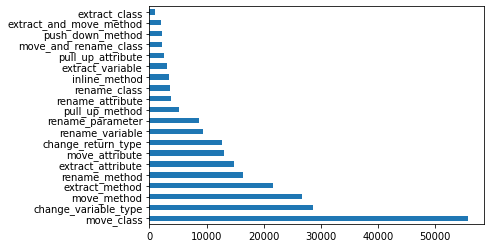

In [6]:
df['type'].value_counts()[:20].plot(kind = 'barh')

In [7]:
# Drop first column of dataframe
df = df.iloc[: , 1:]

In [8]:
df

,id,technicaldept_add,technicaldept_remove,message,type,description,detection_tool
0,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method public getChiSquare() : double ...,refDiff
1,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method public getReducedChiSquare(numb...,refDiff
2,58bfd7a43cff546cd5b42a6d,True,False,"MATH-1206\n\nNew API methods in ""LeastSquaresP...",extract_method,Extract Method\tpublic getChiSquare() : double...,rMiner
3,58bfd7a53cff546cceb42b24,True,False,More debug,extract_variable,Extract Variable\texp : Complex in method publ...,rMiner
4,58bfd7a53cff546cd6b42b56,True,True,Update for next development iteration: commons...,change_return_type,Change Return Type\tUnivariateStatistic to dou...,rMiner
...,...,...,...,...,...,...,...
241106,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,change_return_type,Change Return Type\tReader to TemplateLoaderSe...,rMiner
241107,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,rename_method,Rename Method\tpackage abstract getTemplateSou...,rMiner
241108,60a24db00f99f9deee13e0e2,True,True,- Totally redesigned TemplateLoader interface....,change_return_type,Change Return Type\tObject to TemplateLoadingR...,rMiner
241109,60a24db20f99f9deee13e4ee,True,False,"Removed freemarker.ext.log, our log abstractio...",rename_attribute,Rename Attribute\tATTEMPT_LOGGER : Logger to L...,rMiner


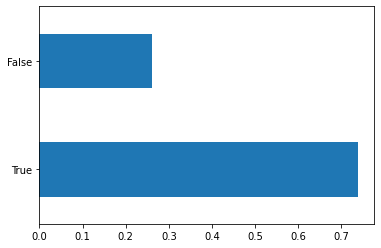

In [9]:
item_counts = df["technicaldept_remove"].value_counts(normalize=True).plot(kind = 'barh')

In [10]:
print(item_counts)

AxesSubplot(0.125,0.125;0.775x0.755)


In [11]:
df['description']

0         Extract Method public getChiSquare() : double ...
1         Extract Method public getReducedChiSquare(numb...
2         Extract Method\tpublic getChiSquare() : double...
3         Extract Variable\texp : Complex in method publ...
4         Change Return Type\tUnivariateStatistic to dou...
                                ...                        
241106    Change Return Type\tReader to TemplateLoaderSe...
241107    Rename Method\tpackage abstract getTemplateSou...
241108    Change Return Type\tObject to TemplateLoadingR...
241109    Rename Attribute\tATTEMPT_LOGGER : Logger to L...
241110    Rename Attribute\tCACHE_LOG : Logger to LOG : ...
Name: description, Length: 241111, dtype: object

In [12]:
df2 = df.loc[df['technicaldept_remove'] == False]

In [15]:
print(df2.nunique())

id                       3727
technicaldept_add           1
technicaldept_remove        1
message                  3422
type                       35
description             55907
detection_tool              2
dtype: int64


<AxesSubplot:>

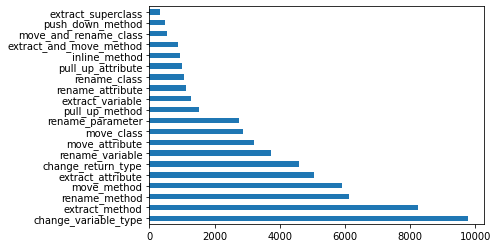

In [21]:
df2['type'].value_counts()[:20].plot(kind = 'barh')

In [22]:
print(df2['type'].value_counts())

change_variable_type               9789
extract_method                     8252
rename_method                      6132
move_method                        5905
extract_attribute                  5052
change_return_type                 4587
rename_variable                    3736
move_attribute                     3215
move_class                         2864
rename_parameter                   2737
pull_up_method                     1515
extract_variable                   1279
rename_attribute                   1116
rename_class                       1050
pull_up_attribute                  1000
inline_method                       952
extract_and_move_method             877
move_and_rename_class               542
push_down_method                    481
extract_superclass                  329
extract_class                       308
parametrize_variable                279
inline_variable                     219
push_down_attribute                 212
replace_variable_with_attribute     170
